### 專案名稱: 第四屆機器學習百日馬拉松
### 功能描述: 第38天作業
### 版權所有: Dunk  
### 程式撰寫: Dunk  
### 撰寫日期：2020/04/10
### 改版日期:  
### 改版備註:

## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

### ANS:

#### import 需要的套件

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

#### 選擇波士頓房地產
[資料集說明](https://scikit-learn.org/stable/datasets/index.html#boston-dataset "資料集說明")

[load_boston用法說明](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html "load_boston用法說明")

[波士頓房地產雲端評估(一)](https://machine-learning-python.kspax.io/application/linear_regression "波士頓房地產雲端評估(一)")


此檔案使用scikit-learn 機器學習套件裡的linear regression演算法，來達成波士頓房地產價錢預測
- 資料集：波士頓房產
- 特徵：房地產客觀數據，如年份、平面大小
- 預測目標：房地產價格
- 機器學習方法：線性迴歸

>機器學習的監督式學習中主要分為回歸問題與分類問題。
>- 回歸代表預測的目標值為實數 (-∞ ⾄至 ∞)
>- 分類代表預測的目標值為類別 (0 或 1)
>- 本案例使用回歸

In [91]:
# 讀取波士頓DataSet
boston_X, boston_y = datasets.load_boston(return_X_y=True)

#### 資料分析

In [92]:
import pandas as pd
boston_X_df = pd.DataFrame(boston_X)
boston_y_df = pd.DataFrame(boston_y)

# 資料內容
print('boston_X_df')
print(boston_X_df.head())
print('--------------------')
print('boston_y_df')
print(boston_y_df.head())

# 資料欄位
print('boston_X_df columns info')
print(boston_X_df.dtypes.value_counts())
print(boston_X_df.describe())
print('--------------------')
print('boston_y_df columns info')
print(boston_y_df.dtypes.value_counts())
print(boston_y_df.describe())


boston_X_df
         0     1     2    3      4      5     6       7    8      9    10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  
--------------------
boston_y_df
      0
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2
boston_X_df columns info
float64    13
dtype: int64
               0           1           2           3           4           5   \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353

#### 回歸實作

In [93]:
# 為方便視覺化，我們只使用資料集中的 1 個 feature (column)
X = boston_X[:, np.newaxis, 2]

# 可以看見有 506 筆資料與我們取出的其中一個 feature
print("Data shape: ", X.shape)

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(X, boston_y, test_size=0.1, random_state=4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

Data shape:  (506, 1)


In [94]:
# 可以看回歸模型的參數值
print('Coefficients: ', regr.coef_)

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Coefficients:  [-0.64959885]
Mean squared error: 63.06


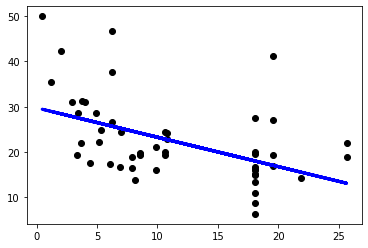

In [95]:
 # 畫出回歸模型與實際資料的分佈
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.show()

#### 選擇葡萄酒分類
[資料集說明](https://scikit-learn.org/stable/datasets/index.html#wine-dataset "資料集說明")

[load_wine用法說明](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html "load_wine用法說明")

[Support-Vector-Machine演算法 - 紅酒種類預測](https://syokujinau.github.io/2018/10/12/ML-course-note-SVM/ "Support-Vector-Machine演算法 - 紅酒種類預測")


數據是由三個不同的種植者對意大利同一地區種植的葡萄酒進行化學分析的結果。對於這三種葡萄酒中的不同成分，進行了十三項不同的測量;
此檔案使用scikit-learn 機器學習套件裡的Logistics regression演算法，來達成三種葡萄酒分類。
- 資料集：葡萄酒資料集
- 特徵：酒類客觀數據，如酒精含量、蘋果酸含量等等
- 預測目標：三種葡萄酒分類
- 機器學習方法：邏輯迴歸

>機器學習的監督式學習中主要分為回歸問題與分類問題。
>- 回歸代表預測的目標值為實數 (-∞ ⾄至 ∞)
>- 分類代表預測的目標值為類別 (0 或 1)
>- 本案例使用分類

In [96]:
# 讀取葡萄酒 DataSet
wine_X, wine_y = datasets.load_wine(return_X_y=True)

#### 資料分析

In [97]:
import pandas as pd
wine_X_df = pd.DataFrame(wine_X)
wine_y_df = pd.DataFrame(wine_y)

# 資料內容
print('wine_X_df')
print(wine_X_df.head())
print('--------------------')
print('wine_y_df')
print(wine_y_df.head())

# 資料欄位
print('wine_X_df columns info')
print(wine_X_df.dtypes.value_counts())
print(wine_X_df.describe())
print('--------------------')
print('wine_y_df columns info')
print(wine_y_df.dtypes.value_counts())
print(wine_y_df.describe())

# 結果集
print('wine結果集')
print(wine_y_df[0].unique())

wine_X_df
       0     1     2     3      4     5     6     7     8     9    10    11  \
0  14.23  1.71  2.43  15.6  127.0  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1  13.20  1.78  2.14  11.2  100.0  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2  13.16  2.36  2.67  18.6  101.0  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3  14.37  1.95  2.50  16.8  113.0  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4  13.24  2.59  2.87  21.0  118.0  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

       12  
0  1065.0  
1  1050.0  
2  1185.0  
3  1480.0  
4   735.0  
--------------------
wine_y_df
   0
0  0
1  0
2  0
3  0
4  0
wine_X_df columns info
float64    13
dtype: int64
               0           1           2           3           4           5   \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean    13.000618    2.336348    2.366517   19.494944   99.741573    2.295112   
std      0.811827    1.117146    0.274344    3.339564   14.282484    0.625851   
min     

#### 分類實作

In [98]:
import warnings
warnings.filterwarnings('ignore')
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine_X, wine_y, test_size=0.1, random_state=4)

# 建立模型
logreg = linear_model.LogisticRegression()

# 訓練模型
logreg.fit(x_train, y_train)

# 預測測試集
y_pred = logreg.predict(x_test)

In [99]:
#正確性
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.8888888888888888
